In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import pandas as pd
import random

### What's going on?
Create range of #'s from -100->100 for X<br>
Create range of #'s from -200->200 for R (why not Y?)<br>
<br>
#### Variables
X: X-axis points<br>
R: Y-axis points<br>
EPS: Epochs. One epoch is one forward pass AND one backward pass of all the training examples<br>
<br>
#### Numpy
X=X.reshape(-1,1)   
    This will reshape the matrix to a new format<br>
    -1 simply means that it is an *unknown dimension* and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the criteria.<br>
    Example:
    <img src="./files/reshape.png">
    
                

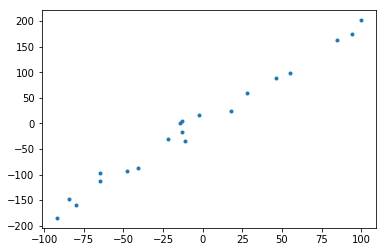

In [2]:
RANGE = 100
COUNT = 20
EPS = 50

# create function that takes x and outputs 2x+10
F_x = lambda x: 2*x + 10
# create an array with values -RANGE->RANGE with COUNT examples
X = np.array([random.randint(-RANGE,RANGE) for i in range(COUNT)])
#print(np.sort(X));
R = np.array([F_x(x)+random.random()*EPS-EPS/2 for x in X])
#print(np.sort(R));

X=X.reshape(-1,1)
R=R.reshape(-1,1)

plt.plot(X,R, '.')
plt.show()

## Hypothesis Function
<img src="./files/hypothesis.png">

## Cost Function
<img src="./files/costfunc.png">

[-100.   -99.9  -99.8 ...   99.7   99.8   99.9]


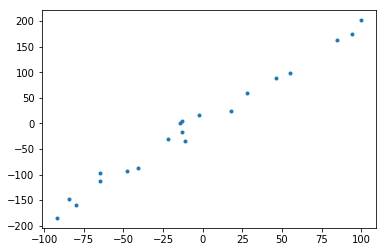

In [3]:
theta = (0,0) # this is a tuple, not a list

# hypothesis function
H_x = lambda x: theta[0] + theta[1]*x

# zip just combines the two separate lists into one iterable
# they have to be equal length tho
#for x,r in zip(X,R):
#    print(x,r)

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)
print(X_plt)
Y_plt = map(H_x,X_plt)
#plt.plot(X_plt, Y_plt)

### numpy.cov
<img src="./files/numpycov.png">

[[ 3351.96        6314.4585322 ]
 [ 6314.4585322  12066.48777526]]
------
5.177756467323534 1.8838108247703098
[4791.03216342]


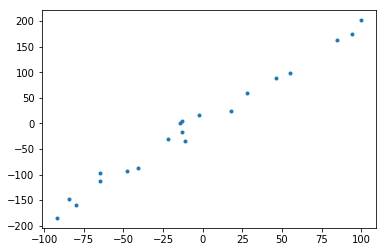

In [4]:
cv = np.cov(X, R, bias=True, rowvar=False)
w1 = cv[1][0]/cv[0][0]

print(cv)
print('------')

Xbar, Ybar = np.mean(X), np.mean(R)

w0 = Ybar - w1*Xbar
print (w0, w1)

theta = (10.7,2)
H_x = lambda x: theta[0] + theta[1]*x

Y = map(H_x, X)
print ( sum ([(r-H_x(x))**2 for x,r in zip(X,R)] ))

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)

Y_plt = map(H_x,X_plt)
#plt.plot(X_plt, Y_plt)

[[-13.   1.]
 [-48.   1.]
 [ -2.   1.]
 [100.   1.]
 [-65.   1.]
 [ 55.   1.]
 [-92.   1.]
 [-84.   1.]
 [ 18.   1.]
 [-80.   1.]
 [-41.   1.]
 [-22.   1.]
 [-11.   1.]
 [ 85.   1.]
 [-14.   1.]
 [ 94.   1.]
 [ 46.   1.]
 [-13.   1.]
 [-65.   1.]
 [ 28.   1.]]
[[1.88381082]
 [5.17775647]]
[3424.8487948]


RuntimeError: matplotlib does not support generators as input

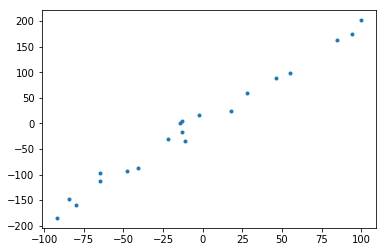

In [5]:
from numpy.linalg import inv 
from numpy import dot, transpose

X_1 = np.append(X,np.ones([len(X),1]),1)
print (X_1)
W = (dot(inv(dot(transpose(X_1), X_1)), dot(transpose(X_1), R)))

print (W)
theta = (W[1],W[0])
H_x = lambda x: theta[0] + theta[1]*x

Y = map(H_x, X)
print ( sum ([(r-H_x(x))**2 for x,r in zip(X,R)] ))

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)

Y_plt = map(H_x,X_plt)
plt.plot(X_plt, Y_plt)

In [6]:
from numpy.linalg import lstsq
print(lstsq(X_1, R)[0])

[[1.88381082]
 [5.17775647]]


C:\Users\agust\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(0, 0)
[242175.24194313]


RuntimeError: matplotlib does not support generators as input

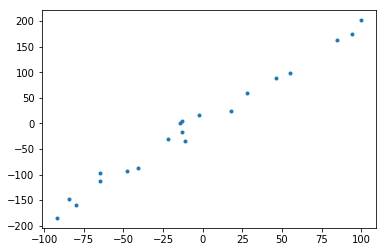

In [7]:
theta = (0,0)
#theta=(10,2)
print (theta)
Y = map(H_x, X)
print ( sum ([(r-H_x(x))**2 for x,r in zip(X,R)] ))

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)

Y_plt = map(H_x,X_plt)
plt.plot(X_plt, Y_plt)

In [ ]:
alpha = 0.0001
print (theta)

w0Grad = -2*sum(R-H_x(X))/len(X)
w1Grad = -2*sum( (R-H_x(X))*X )/len(X)

print ("Gradient: ", w0Grad, w1Grad)
theta = theta[0]-alpha*w0Grad, theta[1]-alpha*w1Grad
print ("Theta: ", theta)

Y = H_x(X)
print ( sum ([(r-H_x(x))**2 for x,r in zip(X,R)] ))

plt.plot(X,R, '.')
X_plt = np.arange(-RANGE,RANGE, 0.1)

Y_plt = map(H_x,X_plt)
plt.plot(X_plt, Y_plt)

In [ ]:
rate = 0.0001
#rate = 1
X = np.array([ [1, 2, 3], [1,3,4], [1,4,5] , [1,5,6] , [1,6,7], [1,8,9]])
c = [1, 2, 3]
R = np.array([14, 19, 24, 29, 34, 44])
w = np.array([0,0,0])
g = np.array([0,0,0])
e = 0
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("Y, Derivative: ", sum(w*x), -2*(r-sum(w*x)))
    g = g + (-2*(r-sum(w*x)) * x)
    e = e + (r-sum(w*x))**2
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = (r-sum(w1*x))**2
print ("Revised Error: ", e/len(X))
iterations = 1

In [ ]:
wF = [ 0.43322452,  2.30207072,  2.73529524]  #50 iterations
w = w1
g = np.array([0,0,0])
e = 0
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("Y, Derivative: ", sum(w*x), -2*(r-sum(w*x)))
    g = g + (-2*(r-sum(w*x)) * x)
    e = e + (r-sum(w*x))**2
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = (r-sum(w1*x))**2
print ("Revised Error: ", e/len(X))
iterations = iterations + 1
print ("Iterations: ", iterations)

In [ ]:
wF = [ 0.06315024,  0.33956832,  0.40271856]
wF = [ 0.43322452,  2.30207072,  2.73529524]  #50 iterations
pX = [x for (a,x,y) in X ]
pY = R
plt.axis([0,10, 0, 50])
plt.plot(pX, pY, "ko")
wFun = lambda ws, p: (wF[0]+wF[1]*p[1]+wF[2]*p[2])
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

In [ ]:
import math
sigmoid = lambda y: 1.0/(1+math.exp(-y))
print (sigmoid(0))
print (sigmoid(10))
print (sigmoid(-10))

slog = lambda x: 0 if x==0 else math.log(x)
CrossEntropy = lambda r, y: -1*(r*slog(y) + (1-r)*slog(1-y))

pX = [x for x in range(-10,10)]
pY = [sigmoid(x) for x in range(-10,10) ]
print (pX, pY)
plt.plot(pX, pY, "k-")

In [ ]:
rate = 0.020
#rate = 1
X = np.array([ [1, 2, 3], [1,3,4], [1,4,5] , [1,5,6] , [1,6,7], [1,8,9]])
R = np.array([0, 0, 0, 1, 1, 1])
w = np.array([0,0,0])
g = np.array([0,0,0])
e = 0
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("Y, Sigmoid(Y), Derivative: ", sum(w*x), sigmoid(sum(w*x)), -(r-sigmoid(sum(w*x))) )
    g = g + (-(r-sigmoid(sum(w*x))) * x)
    e = e + CrossEntropy(r,sigmoid(sum(w*x)))
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = e + CrossEntropy(r, sigmoid(sum(w1*x)))
print ("Revised Error: ", e/len(X))
iterations = 1

In [ ]:
wF = [ 0. ,        -0.83333333, -0.83333333]
wF = [-0.65004852,  0.46679243, -0.18325608]
wF = [-1.30847755,  0.88594056, -0.42253699] # 100 iterations
xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,20, -20, 20])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(wF*x), sigmoid(sum(wF*x)) )


In [ ]:
rate = 0.02
print (w1)
w=w1
g = np.array([0,0,0])
e = 0
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("Y, Derivative: ", sigmoid(sum(w*x)), -(r-sigmoid(sum(w*x))) )
    g = g + (-(r-sigmoid(sum(w*x))) * x)
    e = e + CrossEntropy(r,sigmoid(sum(w*x)))
    print ("gradient: ", g)

print (g/len(X))
print ("Error: ", e/len(X))
w1 = w - g*rate
print (w1)
e=0
for x, r in zip(X,R):
    e = e + CrossEntropy(r,sigmoid(sum(w1*x)))
print ("Revised Error: ", e/len(X))
iterations = iterations + 1
print ("Iterations:  ", iterations)

In [ ]:
xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,10, 0, 10])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wF = [-0.90969232,  0.63174364, -0.27794868]
wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

w= wF
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(w*x), sigmoid(sum(w*x)) )


In [ ]:
#340 iterations
xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,10, 0, 10])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wF = [-1.94183024,  1.29157013, -0.65026011]
wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

w= wF
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(w*x), sigmoid(sum(w*x)) )


In [ ]:
wF = [-11.2784868 ,  7.3432829 , -3.9352039] #6477
wF = [-11.0 ,  7.0 , -4.0] #6477

xPositive = [[1,5,6] , [1,6,7], [1,8,9]]
pX = [x for (a,x,y) in X if [a,x,y] in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] in xPositive]
plt.axis([0,10, 0, 10])
plt.plot(pX, pY, "ro")
pX = [x for (a,x,y) in X if [a,x,y] not in xPositive]
pY = [y for (a,x,y) in X if [a,x,y] not in xPositive]
plt.plot(pX, pY, "bo")

wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "k-")

wF = [-23.14034607 , 15.05128403 , -8.08906203] #55677
wF = [-23.0, 15.0, -8.0]
wFun = lambda ws, p: (wF[0]+wF[1]*p[1])/-wF[2]
pX = [x for (a,x,y) in X]
pY = [wFun(wF, p) for p in X ]
print (pX, pY)
plt.plot(pX, pY, "m-")

w= wF
for x, r in zip(X,R):
    print ("input: ", x)
    print ("required output: ", r)
    print ("wx, Y: ", sum(w*x), sigmoid(sum(w*x)) )


In [ ]:
rate = 0.02
print (w1)
for i in range(1000):
    w=w1
    g = np.array([0,0,0])
    e = 0
    for x, r in zip(X,R):
        g = g + (-(r-sigmoid(sum(w*x))) * x)
        e = e + CrossEntropy(r,sigmoid(sum(w*x)))
    w1 = w - g*rate
    iterations = iterations + 1
for x, r in zip(X,R):
    e = e + CrossEntropy(r,sigmoid(sum(w1*x)))
print ("Revised Error: ", e/len(X))
print ("Iterations: ", iterations)

